<h1><b><center>POST EARTHQUAKE DAMAGE ANALYSIS</center></b></h1>

<h2 style="font-size:16px"><center>Practical Report (Coursework)</center></h2>


<h1><b>INTRODUCTION:</b></h1> 

<p>All the natural disasters including earthquakes are unforeseeable events that cause a huge loss to infrastructure, economy as well as to living beings. Earthquakes have always been a serious threat for ensuring a progressive rational future. Even the developed countries like Japan, ten years ago in March 2011, experienced a tragic earthquake in Fukushima that brought about more than 18,000 human loss and wiped out the Fukushima from world’s map. So our main objective through this practical report  is that to analyze those factors that caused that much damage.We have done this project by using the Python and its assoiciated libraries. Moreover, through visulaization we have showed different analysis. Like how much building structure,land surface,foundation type effect the damage grade.</p>

# Importing some important libraries:

In [2]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Extracting Data from target_values.csv file:

In [3]:
orig_url='https://drive.google.com/file/d/1SArtzwx4DlOAaoHAZhyRTkWUYKuQHbUM/view?usp=sharing'
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)

#DataFrame1
df1 = pd.read_csv(csv_raw) 
df1.head(5)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


# Extracting Data from input_features.csv file:

In [4]:
orig_url1='https://drive.google.com/file/d/1EGoP0dxbiccT77zrzgSpHw_6OM_8Sg52/view?usp=sharing'
file_id1 = orig_url1.split('/')[-2]
dwn_url1='https://drive.google.com/uc?export=download&id=' + file_id1
url3 = requests.get(dwn_url1).text
csv_raw1 = StringIO(url3)

#DataFrame2
df2 = pd.read_csv(csv_raw1) 
df2.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


# checking null values in DateFrame1:

In [5]:
df1.isna().sum()

building_id     0
damage_grade    0
dtype: int64

<i>There are no null values in our DataFrame1 which is extracted from target_values.csv file</i>

# Replacing Damage grade numerical values with textual values in DataFrame1:

In [6]:
df1.loc[df1.damage_grade == 1, 'damage_grade'] = "Low Damage"
df1.loc[df1.damage_grade == 2, 'damage_grade'] = "Medium Damage"
df1.loc[df1.damage_grade == 3, 'damage_grade'] = "Complete Destruction"
df1.head(5)

,building_id,damage_grade
0,802906,Complete Destruction
1,28830,Medium Damage
2,94947,Complete Destruction
3,590882,Medium Damage
4,201944,Complete Destruction


# Checking null values in DataFrame2:

In [7]:
df2.isna().sum() 

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

<b> Result: </b>
<i>There are no null values in DataFrame2</i>

# Replacing Binary vaulue with textual values in DataFrame2:

In [8]:
binary_cols=["has_superstructure_adobe_mud",              
"has_superstructure_mud_mortar_stone",       
"has_superstructure_stone_flag" ,            
"has_superstructure_cement_mortar_stone",    
"has_superstructure_mud_mortar_brick",       
"has_superstructure_cement_mortar_brick",    
"has_superstructure_timber",                
"has_superstructure_bamboo",                
"has_superstructure_rc_non_engineered",      
"has_superstructure_rc_engineered" ]
for col in binary_cols:
    df2.loc[df2[col] == 0, col] = "Not Used"
    df2.loc[df2[col] == 1, col] = "Used"

# Merged both DataFrame1 and DataFrame2:

In [9]:
merged_file= pd.merge(df1, df2, 
                   on='building_id', 
                   how='inner')
merged_file

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,Complete Destruction,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,Medium Damage,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,Complete Destruction,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,Medium Damage,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,Complete Destruction,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,Medium Damage,25,1335,1621,1,55,6,3,n,...,0,0,0,0,0,0,0,0,0,0
260597,669485,Complete Destruction,17,715,2060,2,0,6,5,t,...,0,0,0,0,0,0,0,0,0,0
260598,602512,Complete Destruction,17,51,8163,3,55,6,7,t,...,0,0,0,0,0,0,0,0,0,0
260599,151409,Medium Damage,26,39,1851,2,10,14,6,t,...,0,0,0,0,0,0,0,0,0,0


# To check null values in merged_Data_Frame:

In [10]:
merged_file.isna().sum()

building_id                               0
damage_grade                              0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber       

<b> Result:</b>
<i>There are no null values in Merged_Data_frame</i>

# To check the data types of columns:

In [11]:
merged_file.dtypes

building_id                                int64
damage_grade                              object
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud              object
has_superstructure_mud_mortar_stone       object
has_superstructure_stone_flag             object
has_superstructure_cement_mortar_stone    object
has_superstructure_m

# To check the number of columns and rows:

In [12]:
merged_file.shape


(260601, 40)

# Counting unique values in each column:

In [ ]:
merged_file.nunique()

building_id                               260601
damage_grade                                   3
geo_level_1_id                                31
geo_level_2_id                              1414
geo_level_3_id                             11595
count_floors_pre_eq                            9
age                                           42
area_percentage                               84
height_percentage                             27
land_surface_condition                         3
foundation_type                                5
roof_type                                      3
ground_floor_type                              5
other_floor_type                               4
position                                       4
plan_configuration                            10
has_superstructure_adobe_mud                   2
has_superstructure_mud_mortar_stone            2
has_superstructure_stone_flag                  2
has_superstructure_cement_mortar_stone         2
has_superstructure_m

# Described the descriptive statistics:

In [ ]:
merged_file.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,260601.0,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_other,260601.0,0.014985,0.121491,0.0,0.0,0.0,0.0,1.0
count_families,260601.0,0.983949,0.418389,0.0,1.0,1.0,1.0,9.0


# Sort the buildings according to highest damage grade:

In [ ]:
merged_file.sort_values('damage_grade',ascending=False).head(30) 

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
130300,666622,Medium Damage,26,1023,9865,1,10,10,3,t,...,0,0,0,0,0,0,0,0,0,0
220120,319287,Medium Damage,4,707,3627,2,10,6,5,n,...,0,0,0,0,0,0,0,0,0,0
220118,272076,Medium Damage,12,655,4675,2,50,6,5,t,...,0,0,0,0,0,0,0,0,0,0
121080,144946,Medium Damage,19,1193,5809,2,15,8,6,n,...,0,0,0,0,0,0,0,0,0,0
220117,69796,Medium Damage,12,1226,9804,2,20,6,5,t,...,0,0,0,0,0,0,0,0,0,0
121082,6811,Medium Damage,10,76,8208,2,5,6,5,t,...,0,0,0,0,0,0,0,0,0,0
220116,735151,Medium Damage,15,316,17,3,50,9,6,t,...,0,0,0,0,0,0,0,0,0,0
121084,224753,Medium Damage,22,1152,11726,2,50,8,5,t,...,0,0,0,0,0,0,0,0,0,0
121087,283325,Medium Damage,20,385,7618,2,15,11,5,t,...,0,0,0,0,0,0,0,0,0,0
121088,833157,Medium Damage,8,463,6342,2,15,18,6,t,...,0,0,0,0,0,0,0,0,0,0


<center><h1>Visualization:</h1></center>


<h2><b>Detecting Outliers:</b></h2>

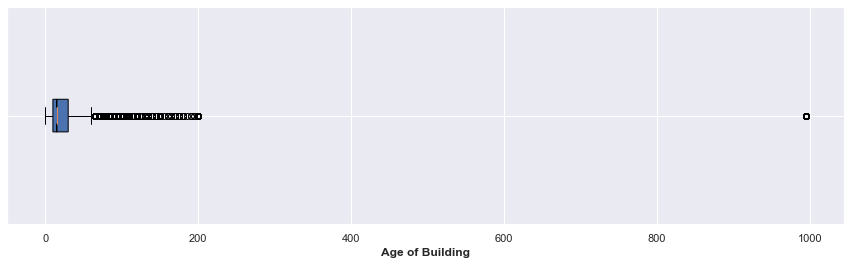

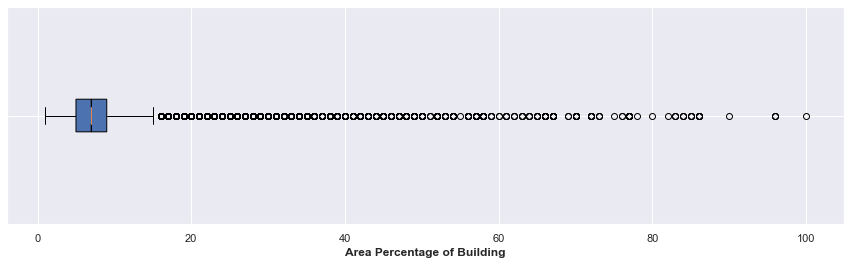

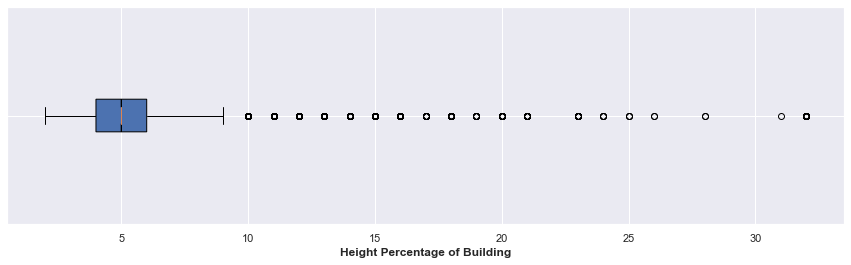

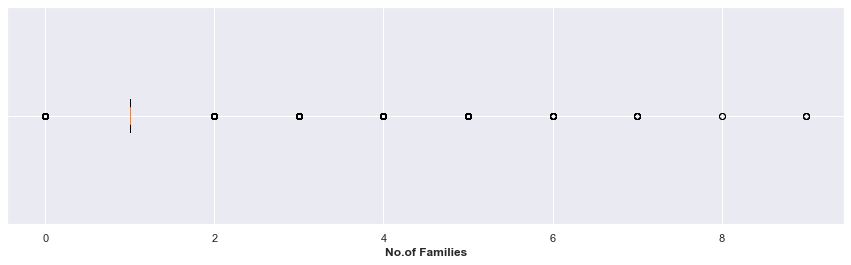

In [ ]:
#Box plot Using Matplotlib 
#creating data
age = merged_file['age']
area_percentage = merged_file['area_percentage']
height_percentage = merged_file['height_percentage']
count_families = merged_file['count_families']
data = {'Age of Building': age, 'Area Percentage of Building': area_percentage, 'Height Percentage of Building':height_percentage, 'No.of Families': count_families}

#iterating through dictionary data
for key in data:
    
    fig = plt.figure(figsize =(15, 4)) #set plot size
    ax = fig.add_subplot(111) #add subplot

    # Creating axes instance
    bp = ax.boxplot(data[key], patch_artist = True,
                    notch ='True', vert = 0)

    # x-axis labels
    plt.xlabel(key,fontweight="bold")
    
    # y-axis tick labels
    ax.set_yticklabels('')
    
    # show plot
    plt.show(bp)

<b><h3> Observation: </h3></b>
The above mentioned graphs shows that there are many outliers outside of the maximum point of data. Moreover,in case of number of families graph we can see that there is some data which is below the minimum point too.

#  Detecting Skewness:

mean: 26.535028645323695
median: 15.0
mode: 0    5.0
dtype: float64


<AxesSubplot:xlabel='age', ylabel='Count'>

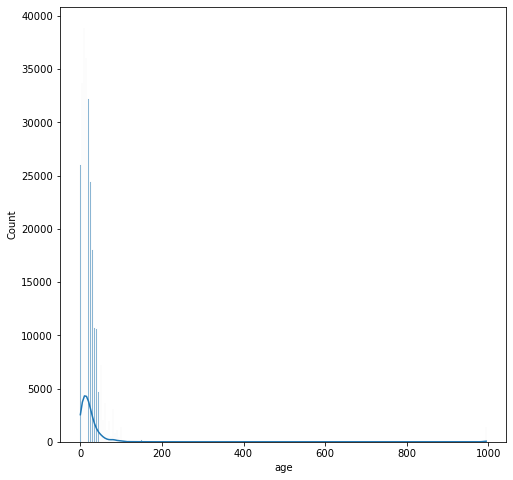

In [ ]:
#Age skewness 
#calculating mean,median,mode
print(f'mean: {merged_file["age"].mean()}')
print(f'median: {merged_file["age"].median()}')
print(f'mode: {merged_file["age"].mode()/2}')

plt.figure(figsize=(8,8)) #set plot size
sns.histplot(data=merged_file,x='age',kde=True) #Display plot

<h3><b> Observation:</b></h3>
As we can see that we have calculated mean,median and mode of age of the building and it shows that our data is positively skewed.It can be expressed from the following formula:
mode<median<mean
                 
5.0<15.0<26.5


mean: 5.43436517895173
median: 5.0
mode: 0    2.5
dtype: float64


<AxesSubplot:xlabel='height_percentage', ylabel='Count'>

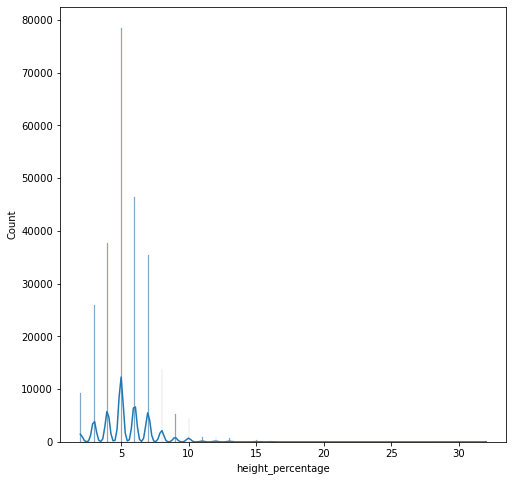

In [ ]:
#height_percentage skewness 
print(f'mean: {merged_file["height_percentage"].mean()}')
print(f'median: {merged_file["height_percentage"].median()}')
print(f'mode: {merged_file["height_percentage"].mode()/2}')

plt.figure(figsize=(8,8)) #set plot size
sns.histplot(data=merged_file,x='height_percentage',kde=True) #Display plot

<b><h3>Observation:</h3></b>
to check the skewness of height percentage of the building we have considered the mean,median and mode of data respectively.It can be expressed from the following rule:
mode<median<mean
                 
2.5<5.0<5.4

mean: 8.018050583075276
median: 7.0
mode: 0    3.0
dtype: float64


<AxesSubplot:xlabel='area_percentage', ylabel='Count'>

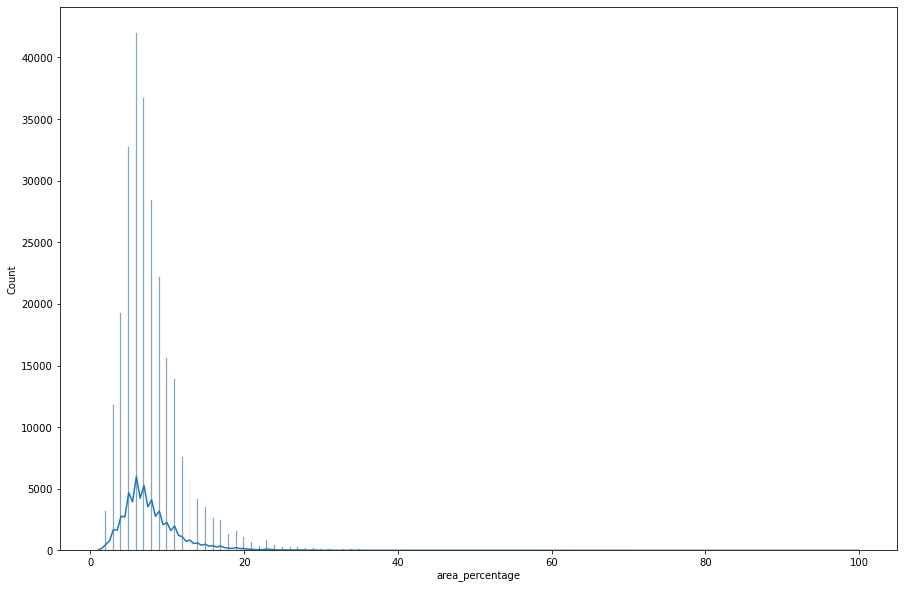

In [ ]:
#area_percentage skewness 
print(f'mean: {merged_file["area_percentage"].mean()}')
print(f'median: {merged_file["area_percentage"].median()}')
print(f'mode: {merged_file["area_percentage"].mode()/2}')

plt.figure(figsize=(15,10))
sns.histplot(data=merged_file,x='area_percentage',kde=True)

<b><h3>Observation:</h3> </b>
We have calculated mean media and mode of area percentage and it shows positive skewness by the given rule: 
    
mode<median<mean
3.0< 7.0<8.0

mean: 0.9839486417933929
median: 1.0
mode: 0    0.5
dtype: float64


<AxesSubplot:xlabel='count_families', ylabel='Count'>

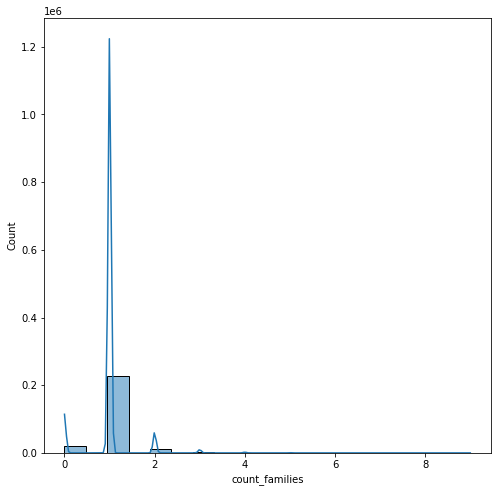

In [ ]:
#count_families skewness 
print(f'mean: {merged_file["count_families"].mean()}')
print(f'median: {merged_file["count_families"].median()}')
print(f'mode: {merged_file["count_families"].mode()/2}')

plt.figure(figsize=(8,8))
sns.histplot(data=merged_file,x='count_families',kde=True)

<b><h3>Observation:</h3> </b>
By considering the mean median and mode of the count_families we have concluded that data of count families is also positively skewed.
The above graphs in which we have checked the skewness of data and they all show thicker right tail along with
mode<median<mean


# Q1: Relationship between building structure and Damage grade

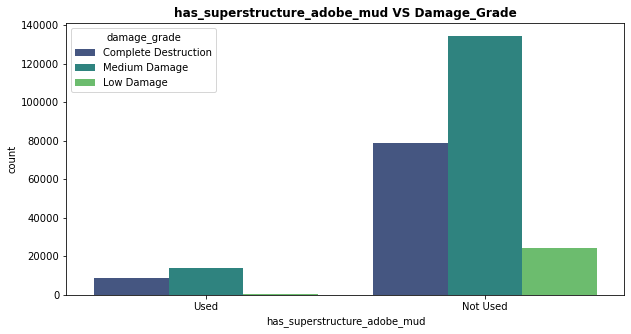

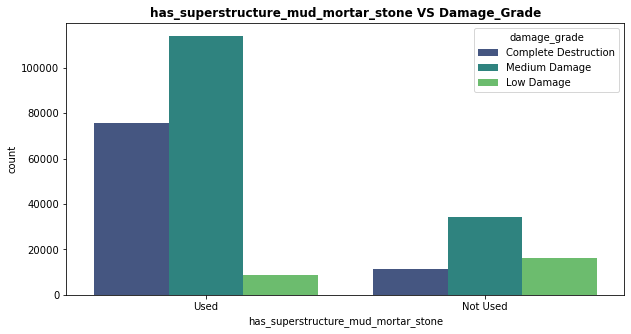

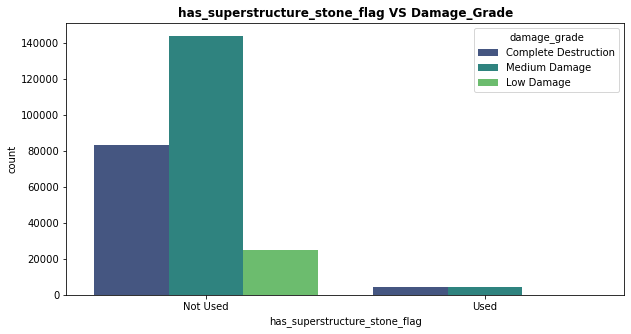

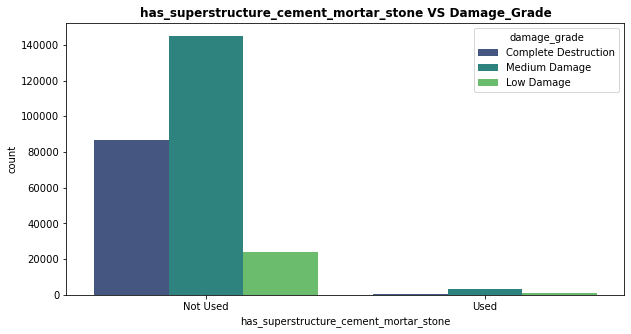

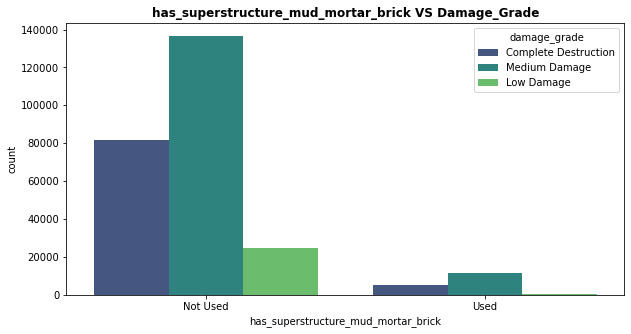

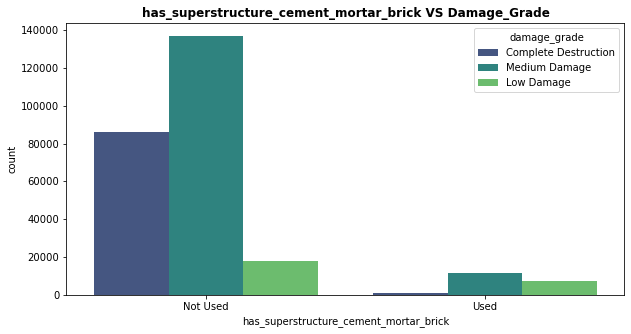

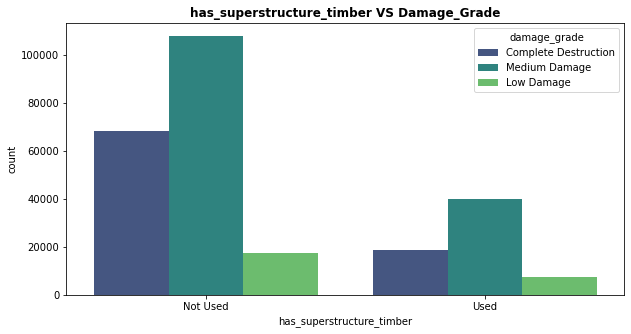

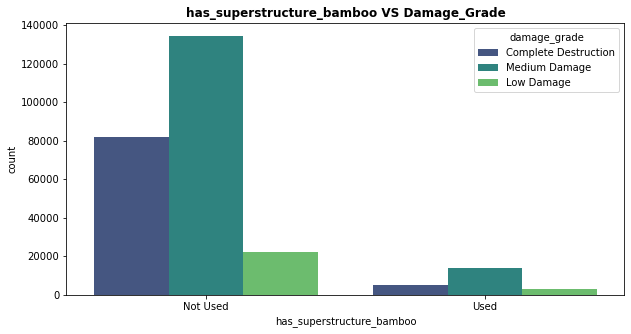

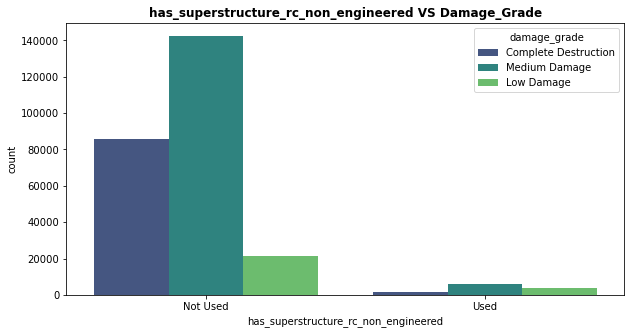

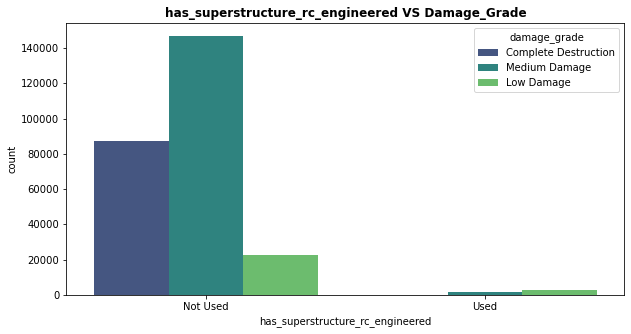

In [ ]:
#Visualization of building struture with damage grade in seaborn
#column Data
binary_cols=["has_superstructure_adobe_mud",              
"has_superstructure_mud_mortar_stone",       
"has_superstructure_stone_flag" ,            
"has_superstructure_cement_mortar_stone",    
"has_superstructure_mud_mortar_brick",       
"has_superstructure_cement_mortar_brick",    
"has_superstructure_timber",                
"has_superstructure_bamboo",                
"has_superstructure_rc_non_engineered",      
"has_superstructure_rc_engineered" ]

#iterating through binary_cols
for col in binary_cols: 
    plt.figure(figsize=(10,5)) #set plot size
    
    sns.countplot(x=merged_file[col],hue=merged_file.damage_grade,palette="viridis")
    plt.title(col+ " VS Damage_Grade",fontweight="bold") #set title
    plt.show() #Display count plot
    pd.set_option("display.max_rows", None)

<b><h3>Observation:</h3></b>
The above generated graphs depict that  usage of certain types of materials in the building structure ad their imapacts on the damage grade.

# Q2:Damage Grade According to land surface condition:

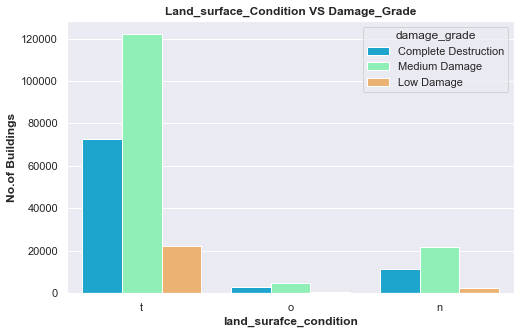

In [ ]:
#Visualization of land surface condition with damage grade in seaborn
plt.figure(figsize=(8,5)) #set plot size
sns.set_theme(font_scale=1.0) #set theme and font_scale
ax = sns.countplot(x="land_surface_condition", hue="damage_grade", data=merged_file, palette="rainbow")#Display plot
b=plt.title("Land_surface_Condition"+ " VS Damage_Grade",fontweight="bold") #set title
c=plt.ylabel("No.of Buildings",fontweight="bold") #set y_label
d=plt.xlabel("land_surafce_condition",fontweight="bold") #set x_label

<b><h3>Observation:</h3></b>
The above graph shows that buildings having land_surface_condition<b> t</b> experienced more damage than<b>o</b> and <b>n</b> land surface condition.
In <b> o</b> land surface condition the buildings faced minimum damage.
The damage grade of the building in the land surface condition <b>t</b> is mostly the medium damage.The second noticable trend was a complete destruction.While low damage was smaller than both damage grades.

# Q3:Which foundation type was safe during the EarthQuake:

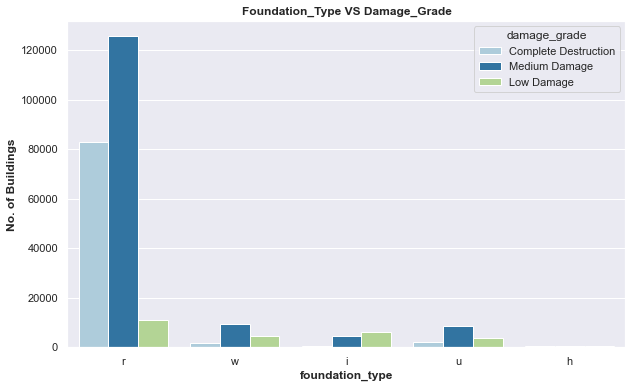

In [ ]:
#Visualization of foundation type with damage grade in seaborn
plt.figure(figsize=(10,6))
sns.set_theme(font_scale=1.0)
ax = sns.countplot(x="foundation_type", hue="damage_grade", data=merged_file, palette="Paired")
b=plt.title("Foundation_Type"+ " VS Damage_Grade",fontweight="bold")
c=plt.ylabel("No. of Buildings",fontweight="bold")
d=plt.xlabel("foundation_type",fontweight="bold")

<b><h3>Observation:</h3></b>
The above illustrated graph shows that maximum number of buildings in foundation type <b>r</b> faced highest damage grade than the other ones.while <b>h</b> faced no damage or very low damage that could not be draw on graph and <b> h</b> was safe foundation type during the earthquake.

## Q:4 Roof constructing material(Type) was considerable factor or not?

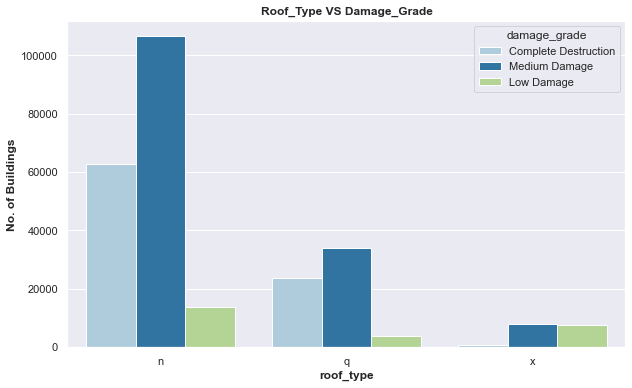

In [ ]:
#Visualization of roof type with damage grade in seaborn
plt.figure(figsize=(10,6))
sns.set_theme(font_scale=1.0)
ax = sns.countplot(x="roof_type", hue="damage_grade", data=merged_file, palette="Paired")
b=plt.title("Roof_Type"+ " VS Damage_Grade",fontweight="bold")
c=plt.ylabel("No. of Buildings",fontweight="bold")
d=plt.xlabel("roof_type",fontweight="bold")

<b><h3>Observations:</h3></b>
Above graph shows the relationship of roof type with damage grade. The roof type <b> n</b> caused more damage and in this type medium damage was greater than low and full damage but noticable factor is that in this roof type buildings experienced complete destruction too. In roof type <b> x</b> there was  alow damage.Hence, it proves that roof type is the considerable factor during the earthquak in building damage.

# Q:5 How older and worn out buildings reacted towards Earthquake

In [ ]:
#maximum value in age column
merged_file["age"].max()

995

In [ ]:
#minimum value in age column
merged_file["age"].min()

0

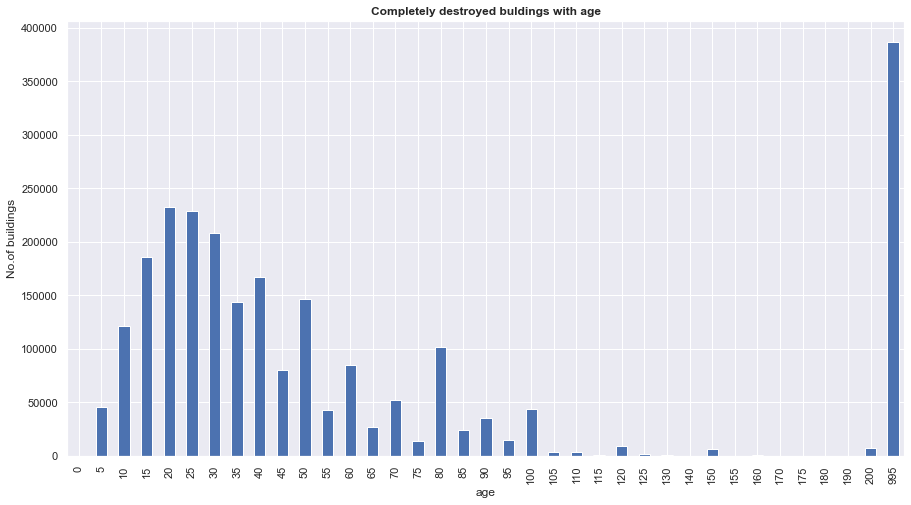

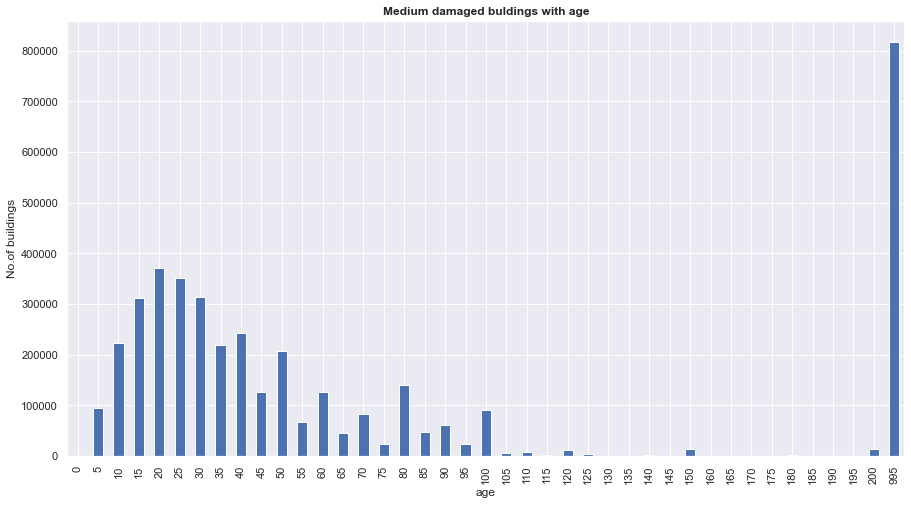

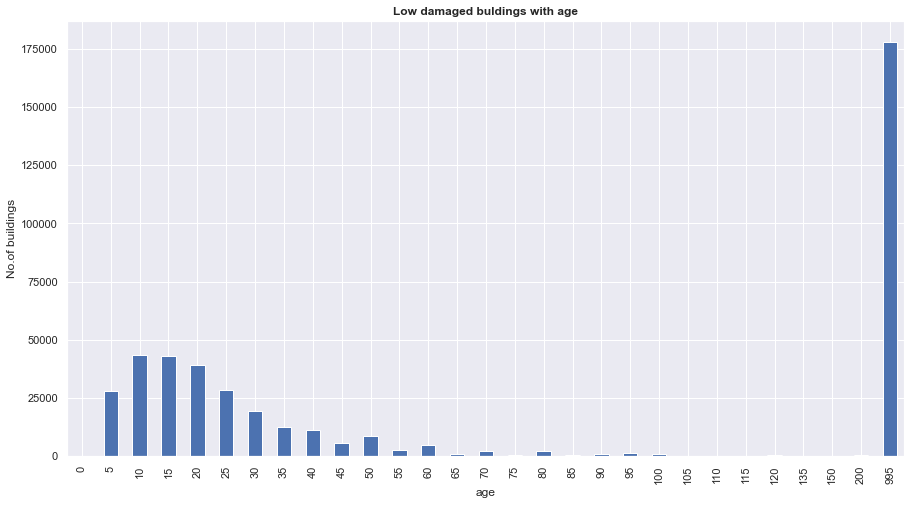

In [ ]:
#Visualization of age with damage grade of the building in Matplotlib:
data = {
    'Complete Destruction': 'Completely destroyed buldings with age',
    'Medium Damage': 'Medium damaged buldings with age', 
    'Low Damage':'Low damaged buldings with age'
}

for key in data:
    plt.figure(figsize=(15,8))
    
    #conditional group by with bar plot
    ax1=merged_file.query('damage_grade=="'+key+'"').groupby('age')["age"].sum().plot.bar() 
    
    #set title and label
    plt.title(data[key], fontweight='bold')
    plt.ylabel('No.of buildings')
    plt.show(ax1) #display plot

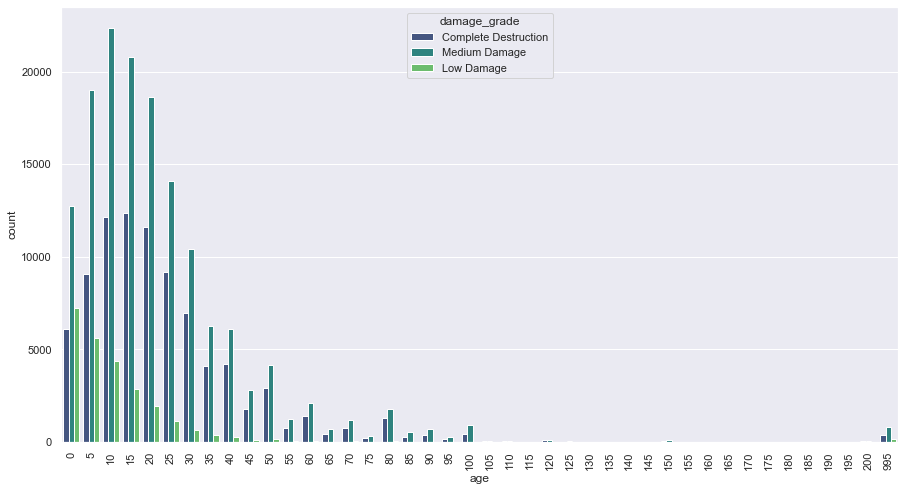

In [ ]:
#Visualization of age with damage grade of the building in seaborn:
b=plt.figure(figsize=(15,8))
ax = sns.countplot(x="age", hue="damage_grade", data=merged_file,palette="viridis")
a=plt.xticks(rotation=90)


<b><h3>Observation:</h3></b>At this analysis we can say that the buidings with less age faced more damage because in this graph buildings with the heighest age experienced damage but it was not that much.

# Q:6 Does the height percentage of the buildings effect the damage grade:

In [ ]:
#maximum value in height percentage column
merged_file["height_percentage"].max()

32

In [ ]:
#minimum value in height percentage column
merged_file["height_percentage"].min()

2

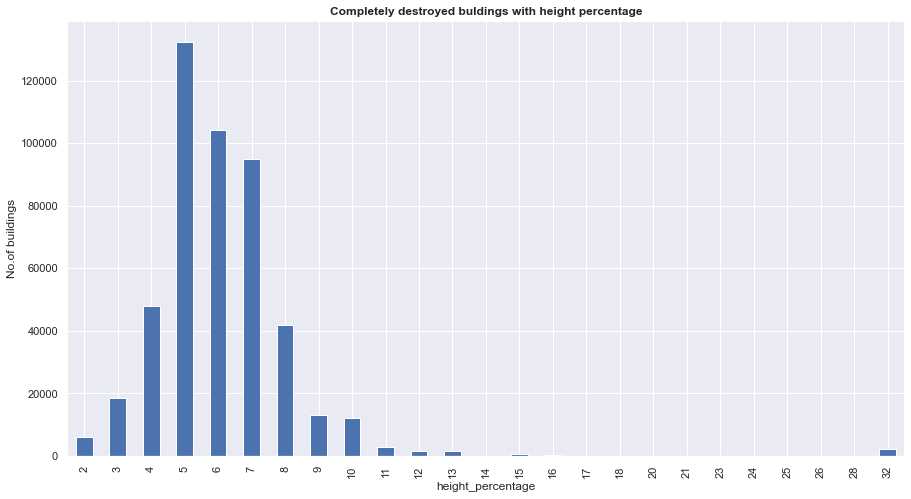

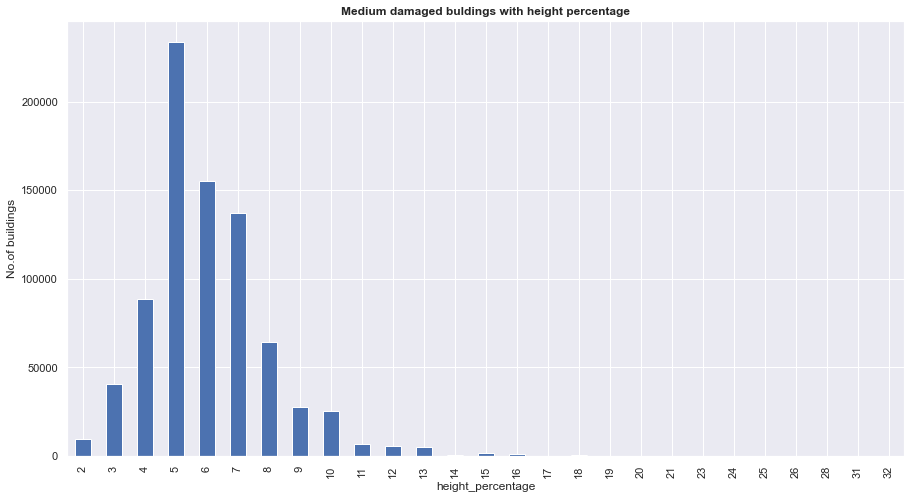

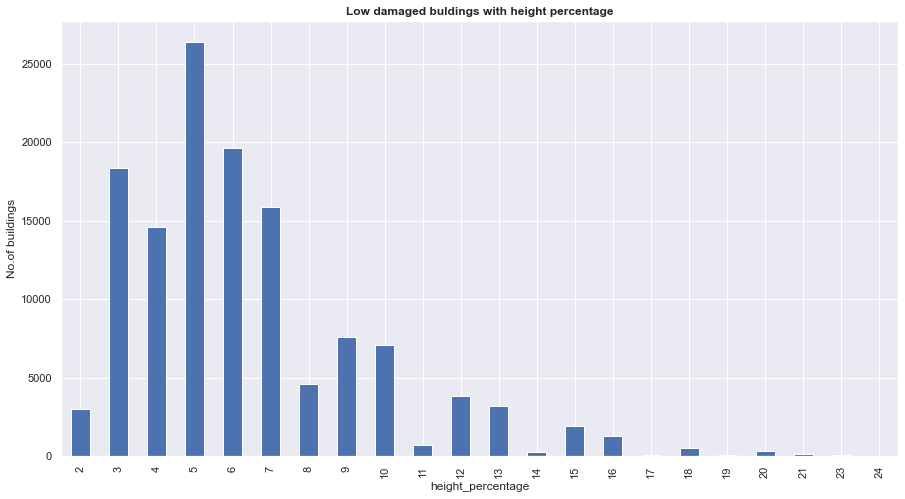

In [ ]:
#Visualization of height percentage with damage grade of the building in Matplotlib 
data = {
    'Complete Destruction': 'Completely destroyed buldings with height percentage',
    'Medium Damage': 'Medium damaged buldings with height percentage', 
    'Low Damage':'Low damaged buldings with height percentage'
}

for key in data:
    plt.figure(figsize=(15,8))
    #conditional group by with bar plot
    ax1=merged_file.query('damage_grade=="'+key+'"').groupby('height_percentage')["height_percentage"].sum().plot.bar()
    plt.title(data[key], fontweight='bold')
    plt.ylabel('No.of buildings')
    plt.show(ax1)

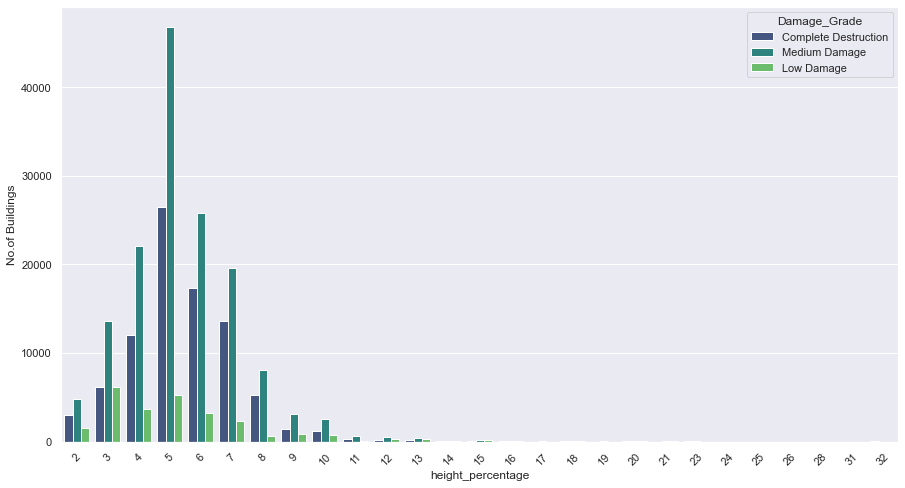

In [ ]:
#Visualization of height percentage with damage grade of the building in seaborn: 
a=plt.figure(figsize=(15,8))
ax = sns.countplot(x="height_percentage", hue="damage_grade", data=merged_file,palette="viridis")
plt.legend(loc="upper right",title="Damage_Grade")
plt.ylabel("No.of Buildings")
plt.xlabel("height_percentage")
b=plt.xticks(rotation=45)

<b><h3>Observation:</h3></b>The regular pattern that can be seen in the above graph is that medium damage grade increased from<b> 0</b> to <b>5</b> height percentage of the buildings.After that it started declining.

# Q7: How many families effected by damage grade:

In [ ]:
merged_file["count_families"].max()

9

In [ ]:
merged_file["count_families"].min()

0

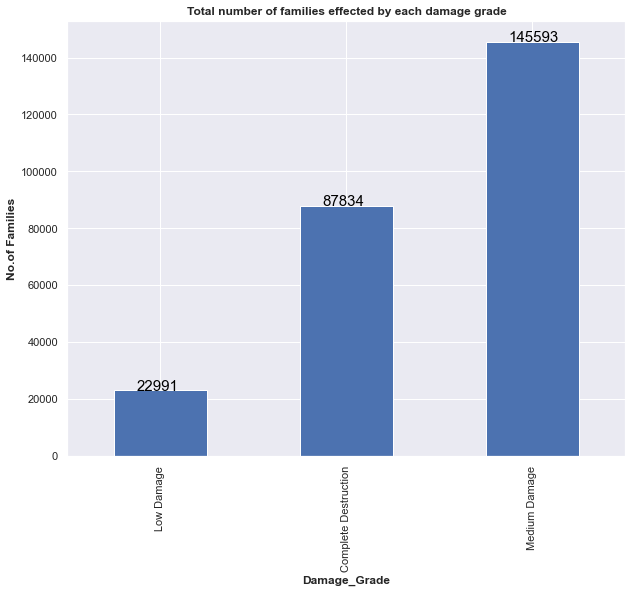

In [ ]:
#By using Matplotlib:
plt.figure(figsize=(10,8))
ax=merged_file.groupby("damage_grade")["count_families"].sum().sort_values().plot.bar()
totals = []
#calculating number of effected families
for i in ax.patches:
    ax.text(i.get_x()+.12, i.get_height()+15, 
            str(i.get_height()), fontsize=15,
                color='black') #display effected number of families
    
a=plt.ylabel("No.of Families",fontweight='bold')
b=plt.xlabel("Damage_Grade",fontweight='bold')
c=plt.title("Total number of families effected by each damage grade",fontweight="bold")
                                                                               

<b><h3>Note:</h3></b>
Q#7 that we mentioned in our report<b style="color:red"> "Which kind of land surface experience more damage"</b>already have explained in our question#1.To avoid repeatness we are  going to change the Question. Now the question is:<b style="color:green"> How many families got effected by the each level of damage grade</b>.
<h3><b>Observation</b></h3>
Above graph shows that most people are effected by the Medium Damage. 

# Q8:Does damage grade depends on the number of floors in a buildings

In [ ]:
#maximum value in count_floors_pre_eq column
merged_file["count_floors_pre_eq"].max()


9

In [ ]:
#minimum value in count_floors_pre_eq column
merged_file["count_floors_pre_eq"].min()

1

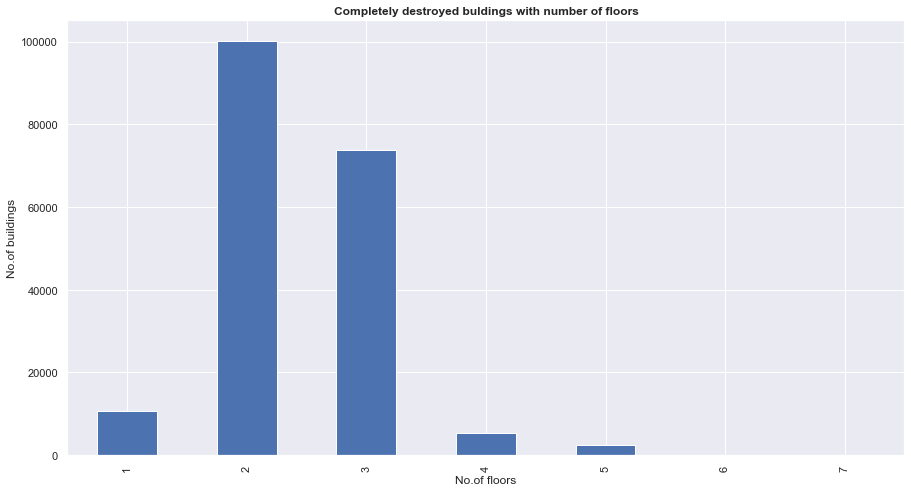

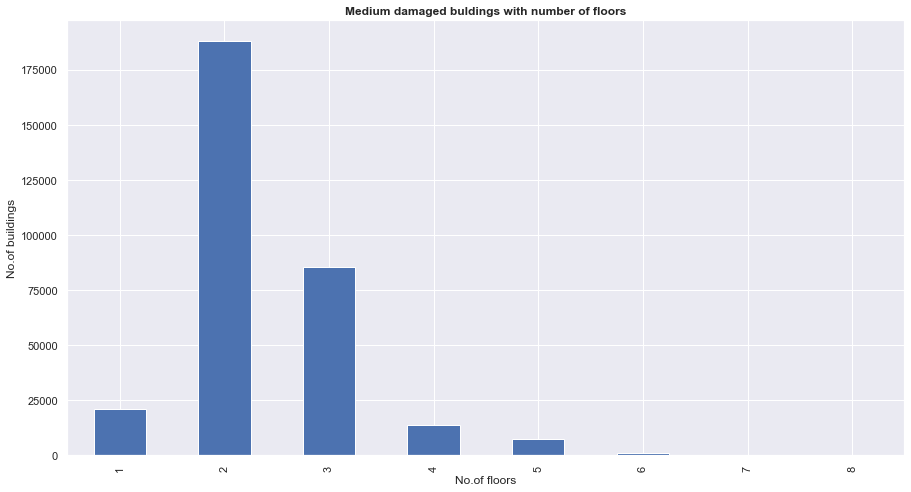

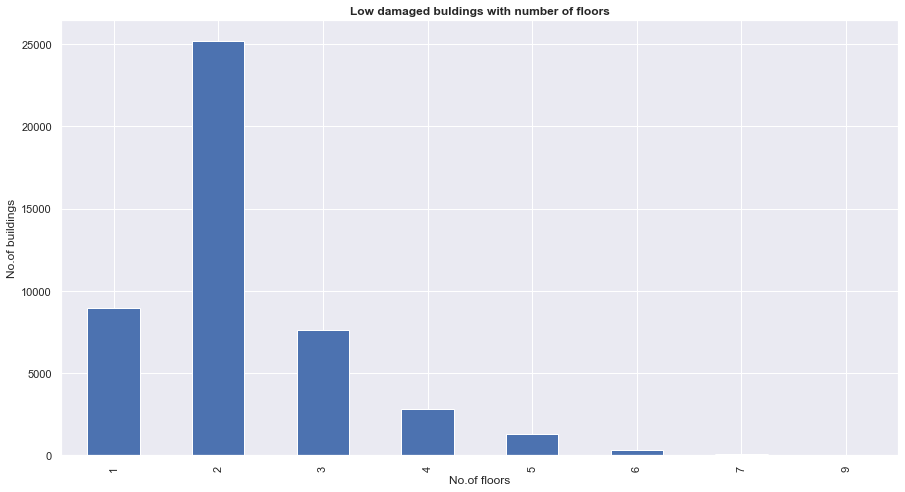

In [ ]:
#Visualization of number of floors with damage grade of the building in Matplotlib: 
data = {
    'Complete Destruction': 'Completely destroyed buldings with number of floors',
    'Medium Damage': 'Medium damaged buldings with number of floors', 
    'Low Damage':'Low damaged buldings with number of floors'
}
#iterating through Dictionary data
for key in data:
    plt.figure(figsize=(15,8)) #set plot size
    
    #conditional group by with bar plot
    ax1=merged_file.query('damage_grade=="'+key+'"').groupby('count_floors_pre_eq')["count_floors_pre_eq"].sum().plot.bar()
    plt.title(data[key], fontweight='bold') #set title and fontweight
    plt.ylabel('No.of buildings') #set y label
    plt.xlabel('No.of floors')   #set x label
    plt.show(ax1) #display plot

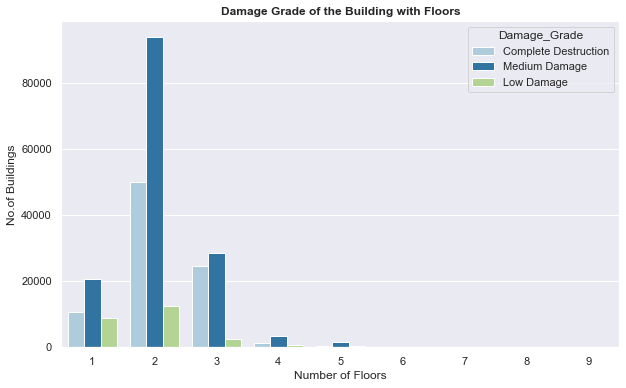

In [ ]:
#visualization of no of floors with damage grade of the buildings in seaborn:
plt.figure(figsize=(10,6))
sns.set_theme(font_scale=1.0)
ax = sns.countplot(x="count_floors_pre_eq", hue="damage_grade", data=merged_file, palette="Paired")
a=plt.legend(loc="upper right",title="Damage_Grade")
b=plt.ylabel("No.of Buildings")
c=plt.title("Damage Grade of the Building with Floors",fontweight="bold")
d=plt.xlabel("Number of Floors")

<b><h3>Observation:</h3></b>Above illustrated graphs shows that buildings with<b> 2</b> floors suffered more damage.